## Hello, you ;)
This is a notebook for testing project ideas and ugly EDA stuff
- **FOR AUTHORIZED EYES ONLY**
    - or not idrc

In [1]:
# !pip install geopandas
# !pip install mapclassify
import geopandas as gpd
import mapclassify
import shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', 150)

In [86]:
# load review data
reviews = pd.read_csv('../inputs/reviews.csv.gz', compression='gzip')
reviews["date"] = pd.to_datetime(reviews["date"])
reviews = reviews.drop('id', axis=1)
reviews

listing_id       date  reviewer_id reviewer_name  \
0                     3781 2015-07-10     36059247          Greg   
1                     3781 2015-08-09     10459388           Tai   
2                     3781 2015-09-01     12264652        Damien   
3                     3781 2015-09-30     41426327          Mike   
4                     3781 2015-10-30     15151513          Ivan   
...                    ...        ...          ...           ...   
162911  730465117588795606 2022-12-21    144733920      Marcello   
162912  730465117588795606 2023-01-01    325113163         Kasey   
162913  730478965019511672 2022-11-26    164074348   Zhengyanyan   
162914  730478965019511672 2023-01-03    181777865       William   
162915  731257486642956305 2023-03-17    494357292     Christine   

                                                 comments  
0       The apartment was as advertised and Frank was ...  
1       It was a pleasure to stay at Frank's place. Th...  
2       The apartment description is entirely faithful...  
3       Thoroughly enjoyed my time at Frank's home. Ha...  
4       Great value for the money! This location has e...  
...                                                   ...  
162911                     I really enjoyed my time here!  
162912  Perfect for a quick weekend trip to Boston. Gr...  
162913  Very nice and helpful host!!! Very nice stay e...  
162914  Great place….new, clean, modern, spacious, amp...  
162915  Great place to stay. Jessica was very helpful ...  

[162916 rows x 5 columns]

In [4]:
# load calander data
calendar = pd.read_csv('../inputs/calendar.csv.gz', compression='gzip')
calendar["date"] = pd.to_datetime(calendar["date"])

In [5]:
# Boston airbnb listings data
listings = pd.read_csv('../inputs/listings.csv.gz', compression='gzip')

In [6]:
# testing the combination of review and listing data (This is all reviews for each listing)
test_merge = pd.merge(listings, reviews.rename(columns={"listing_id":"id", "date":"review_date"}), on='id', how='left')

In [7]:
# testing combination of calendar and listing data (HELPFUL | This is all listing data on each date into the next year)
test_merge2 = pd.merge(calendar.rename(columns={"listing_id":"id"}), listings.rename(columns={"price":"3/2023_price"}), on='id', how='left')

In [8]:
# load census tract data for boston
tract_data = pd.read_csv("../inputs/census-tract-data.csv")

In [9]:
# load census neighborhood data for boston
neighborhood_data = pd.read_csv("../inputs/boston-neighborhood-data.csv")

In [10]:
calendar['date'].min()

Timestamp('2023-03-19 00:00:00')

In [11]:
calendar['date'].max()

Timestamp('2024-03-18 00:00:00')

In [12]:
reviews['date'].min()

Timestamp('2009-03-21 00:00:00')

In [13]:
reviews['date'].max()

Timestamp('2023-03-19 00:00:00')

In [14]:
listings['last_scraped'].min()

'2023-03-19'

In [15]:
listings['last_scraped'].max()

'2023-03-20'

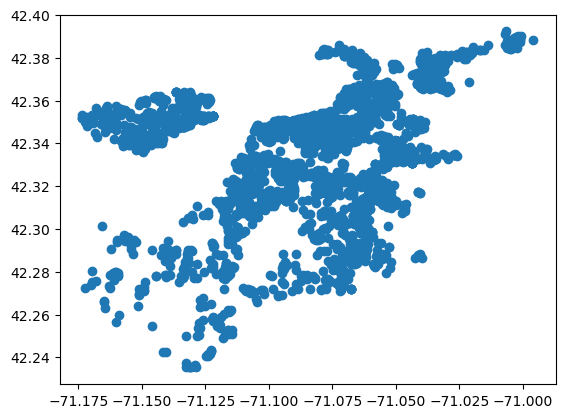

In [16]:
# this is where every Airbnb listing is in our data set (no map tho)
plt.scatter(listings['longitude'], listings['latitude'])

In [17]:
# gotta get a map of tracts
boston_tract = gpd.read_file("../inputs/Census2020_Tracts/Census2020_Tracts.shp")

In [18]:
boston_tract

OBJECTID STATEFP20 COUNTYFP20 TRACTCE20      GEOID20   NAME20  \
0           1        25        025    140202  25025140202  1402.02   
1           2        25        025    140300  25025140300     1403   
2           3        25        025    140400  25025140400     1404   
3           4        25        025    140106  25025140106  1401.06   
4           5        25        025    110201  25025110201  1102.01   
..        ...       ...        ...       ...          ...      ...   
202       203        25        025    061202  25025061202   612.02   
203       204        25        025    070801  25025070801   708.01   
204       205        25        025    060601  25025060601   606.01   
205       206        25        025    070901  25025070901   709.01   
206       207        25        025    981501  25025981501  9815.01   

       NAMELSAD20 MTFCC20 FUNCSTAT20  ALAND20  AWATER20   INTPTLAT20  \
0    Census Tract   G5020          S  1538599     17120  +42.2495181   
1    Census Tract   G5020          S  1548879     38736  +42.2587734   
2    Census Tract   G5020          S  1874512     11680  +42.2692219   
3    Census Tract   G5020          S   278837      3116  +42.2738738   
4    Census Tract   G5020          S   348208         0  +42.2804960   
..            ...     ...        ...      ...       ...          ...   
202  Census Tract   G5020          S   380810      4897  +42.3387527   
203  Census Tract   G5020          S    61235         0  +42.3399771   
204  Census Tract   G5020          S   140332         0  +42.3392514   
205  Census Tract   G5020          S    57691         0  +42.3377169   
206  Census Tract   G5020          S   897746   1203439  +42.3524288   

       INTPTLON20    Shape_STAr    Shape_STLe  \
0    -071.1175430  1.674441e+07  18525.133039   
1    -071.1188131  1.708768e+07  24186.699503   
2    -071.1118088  2.030132e+07  27404.983907   
3    -071.1371416  3.034720e+06   7521.419039   
4    -071.1170508  3.747840e+06  10276.929778   
..            ...           ...           ...   
202  -071.0625085  4.151441e+06   9863.203623   
203  -071.0825322  6.590784e+05   3324.809260   
204  -071.0489604  1.510420e+06   5135.560328   
205  -071.0795662  6.209278e+05   3841.042994   
206  -071.0878101  2.261551e+07  79211.972387   

                                              geometry  
0    POLYGON ((757373.036 2913676.433, 757377.218 2...  
1    POLYGON ((756308.459 2916770.814, 756446.058 2...  
2    POLYGON ((757682.058 2924622.055, 757807.152 2...  
3    POLYGON ((753408.502 2925331.042, 753418.584 2...  
4    POLYGON ((759003.960 2926858.165, 759043.379 2...  
..                                                 ...  
202  POLYGON ((773636.394 2947776.746, 773641.530 2...  
203  POLYGON ((768450.923 2949304.833, 768550.937 2...  
204  POLYGON ((777185.384 2949170.447, 777313.336 2...  
205  POLYGON ((769230.210 2948676.359, 769406.112 2...  
206  POLYGON ((745730.080 2956006.682, 745756.162 2...  

[207 rows x 16 columns]

In [19]:
# these coordinates are not standard
boston_tract['geometry'].head()

0    POLYGON ((757373.036 2913676.433, 757377.218 2...
1    POLYGON ((756308.459 2916770.814, 756446.058 2...
2    POLYGON ((757682.058 2924622.055, 757807.152 2...
3    POLYGON ((753408.502 2925331.042, 753418.584 2...
4    POLYGON ((759003.960 2926858.165, 759043.379 2...
Name: geometry, dtype: geometry

In [20]:
# set to the standard longitute/latitude system
boston_tract = boston_tract.to_crs('epsg:4326')

In [21]:
# much better
boston_tract['geometry'].head()

0    POLYGON ((-71.12623 42.24267, -71.12621 42.244...
1    POLYGON ((-71.13012 42.25117, -71.12960 42.251...
2    POLYGON ((-71.12491 42.27270, -71.12445 42.273...
3    POLYGON ((-71.14069 42.27470, -71.14065 42.275...
4    POLYGON ((-71.11999 42.27882, -71.11984 42.279...
Name: geometry, dtype: geometry

<Axes: >

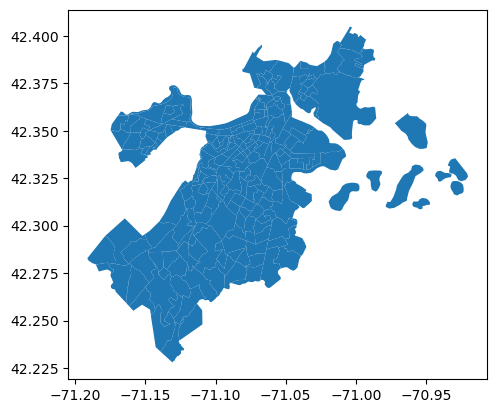

In [22]:
# census tracts map
boston_tract.plot()

In [23]:
# this step maps each longitude and latitude to a shapely point
listings = gpd.GeoDataFrame(listings, geometry=listings.apply(
        lambda srs: shapely.geometry.Point(srs['longitude'], srs['latitude']), axis='columns'
    ))

In [24]:
# function to create a new column based on whether or not a listing is in a tract
def assign_census_tract(bnb):
    bools = [geom.contains(bnb['geometry']) for geom in boston_tract['geometry']]
    if True in bools:
        return boston_tract.iloc[bools.index(True)]['NAME20']
    else:
        return np.nan

In [25]:
# .apply the function to the listings
listings['census_tract'] = listings.apply(assign_census_tract, axis='columns')

In [26]:
# this is how many listings are in each census tract
listings['census_tract'].value_counts().head()

702.02    105
907        98
701.02     92
814        87
701.04     87
Name: census_tract, dtype: int64

In [27]:
# use .map() to apply value_counts to each value of 'NAME20'
boston_tract['BNBs'] = boston_tract['NAME20'].map(listings['census_tract'].value_counts())
boston_tract['BNBs'] = boston_tract['BNBs'].fillna(0)
boston_tract.set_index('NAME20', inplace=True)

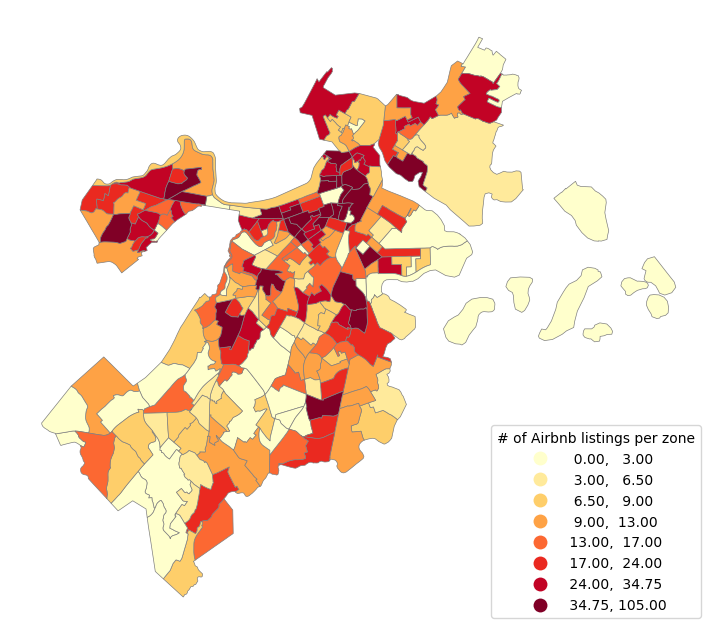

In [28]:
# what a nice choropleth map
# it shows the amount of listings in each zone
# but its not scaled for population density
f = plt.figure(figsize=(9,9.15))
ax = f.gca()
kw = dict(column='BNBs', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_tract.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': '# of Airbnb listings per zone'})
ax.set_axis_off()

In [29]:
# this code reprojects the areas into an "equal-area" projection
# this is so that I can get listings per Kilometer^2
boston_tract['BNBDensity'] = (boston_tract['BNBs'] / boston_tract['geometry']\
                            .to_crs('epsg:3395')\
                            .map(lambda p: p.area / 10**6))\
                            .fillna(0)

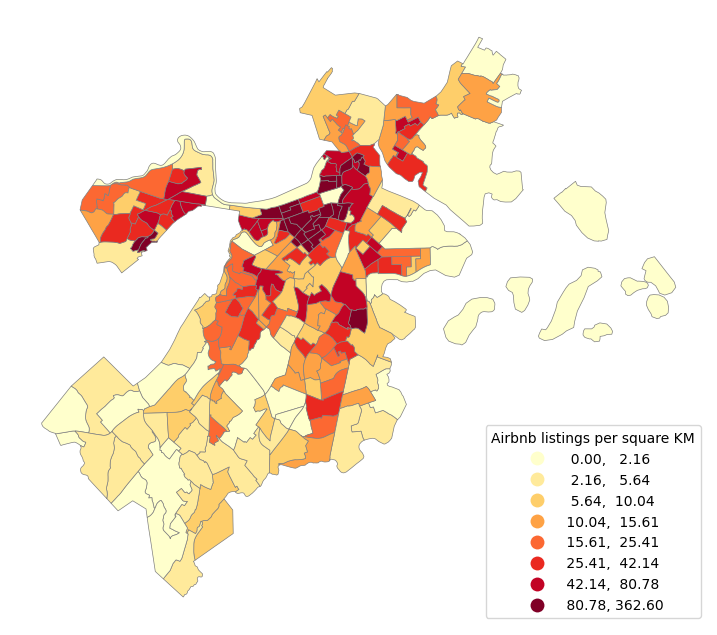

In [30]:
# this graph represents listings per square KM as census tracts
f = plt.figure(figsize=(9, 9))
ax = f.gca()
kw = dict(column='BNBDensity', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_tract.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': "Airbnb listings per square KM"})
ax.set_axis_off()

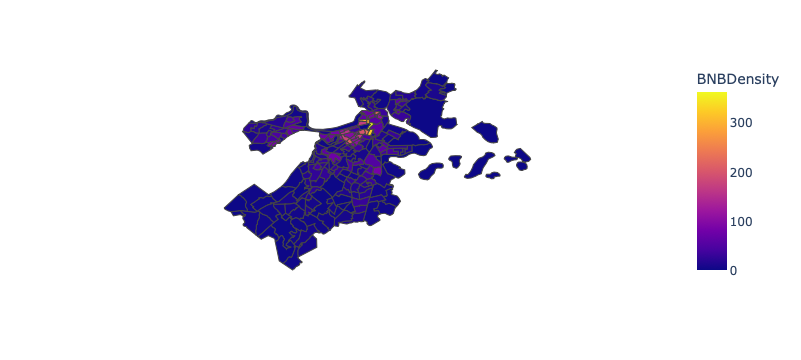

In [31]:
# a nicer (and interactive) choropleth map using plotly
fig = px.choropleth(boston_tract, geojson=boston_tract.geometry, locations=boston_tract.index, color="BNBDensity")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

### Next I will do the same but with neighborhood data. Mostly as a test

In [32]:
# map of neighborhoods
boston_NBH = gpd.read_file("../inputs/Census2020_BG_Neighborhoods/Census2020_BG_Neighborhoods.shp")

In [33]:
# gotta make same fix for CRS as above
boston_NBH = boston_NBH.to_crs('epsg:4326')

<Axes: >

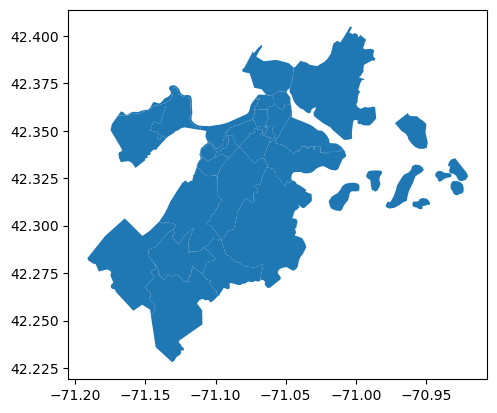

In [34]:
# neighborhood map
boston_NBH.plot()

In [35]:
# function to create a new column based on whether or not a listing is in a neighborhood
def assign_census_NBH(bnb):
    bools = [geom.contains(bnb['geometry']) for geom in boston_NBH['geometry']]
    if True in bools:
        return boston_NBH.iloc[bools.index(True)]['BlockGr202']
    else:
        return np.nan

In [36]:
# .apply the function to the listings
listings['census_NBH'] = listings.apply(assign_census_NBH, axis='columns')

In [37]:
# this is how many listings are in each Neighborhood
listings['census_NBH'].value_counts().head()

Dorchester    512
South End     327
Downtown      307
Roxbury       292
Brighton      284
Name: census_NBH, dtype: int64

In [38]:
# use .map() to apply value_counts to each value of 'BlockGr202'
boston_NBH['BNBs'] = boston_NBH['BlockGr202'].map(listings['census_NBH'].value_counts())
boston_NBH['BNBs'] = boston_NBH['BNBs'].fillna(0)
boston_NBH.set_index('BlockGr202', inplace=True)

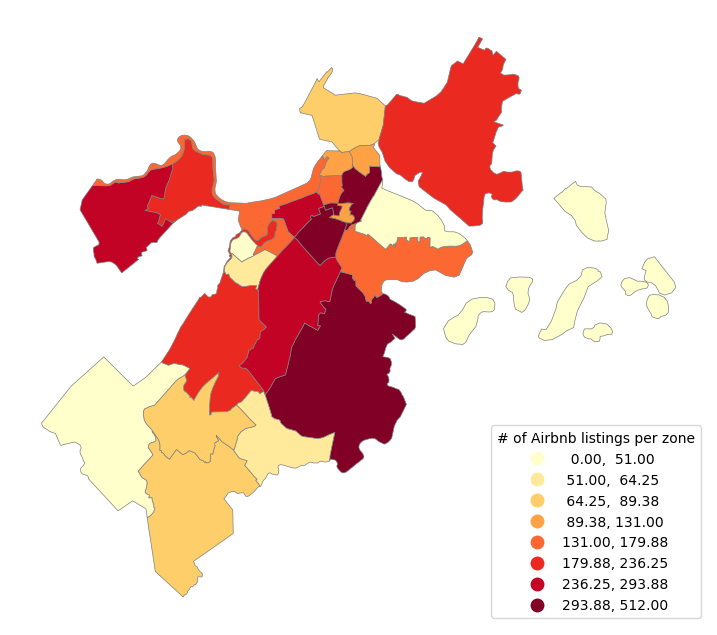

In [39]:
# choropleth map for neighborhoods
# disregards population density
f = plt.figure(figsize=(9,9.15))
ax = f.gca()
kw = dict(column='BNBs', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_NBH.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': '# of Airbnb listings per zone'})
ax.set_axis_off()

In [40]:
# this code reprojects the areas into an "equal-area" projection
# this is so that I can get listings per Kilometer^2
boston_NBH['BNBDensity'] = (boston_NBH['BNBs'] / boston_NBH['geometry']\
                            .to_crs('epsg:3395')\
                            .map(lambda p: p.area / 10**6))\
                            .fillna(0)

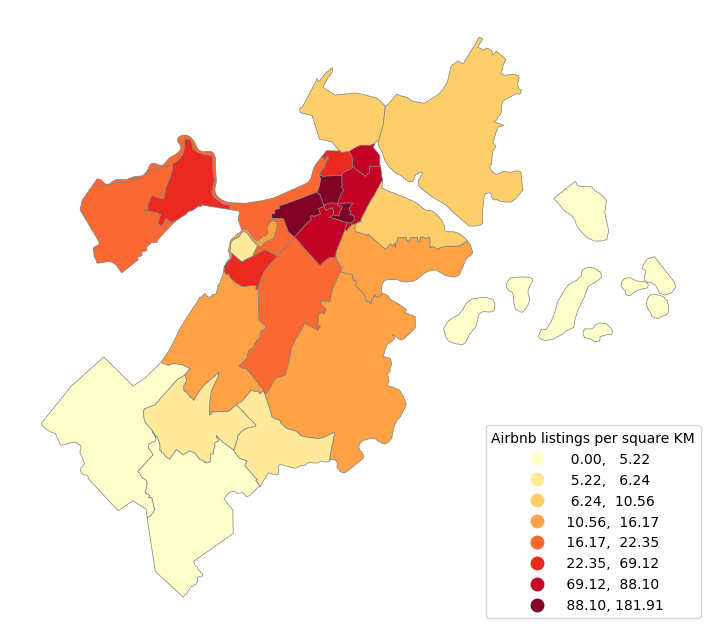

In [41]:
# this graph represents listings per square KM as Neighborhoods
f = plt.figure(figsize=(9, 9))
ax = f.gca()
kw = dict(column='BNBDensity', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_NBH.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': "Airbnb listings per square KM"})
ax.set_axis_off()

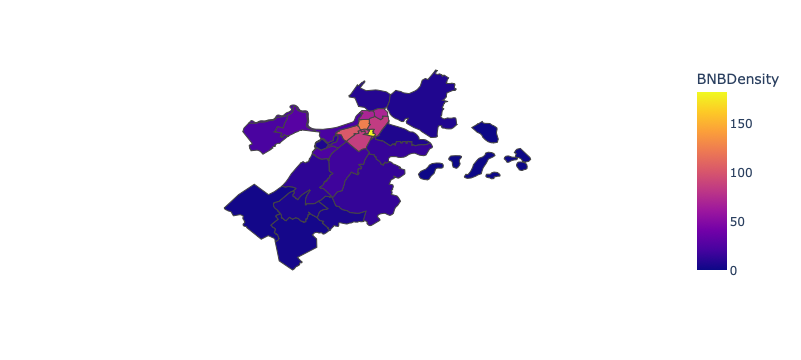

In [42]:
# trying to make clicking available (doesn't seem worth it here)
# ended up being very helpful for default select
fig = px.choropleth(boston_NBH, 
                    geojson=boston_NBH['geometry'], 
                    locations=boston_NBH.index, 
                    color="BNBDensity",
                    custom_data=['BNBs'])

fig.update_geos(fitbounds="locations", visible=False)

fig.update_traces(hovertemplate='<b>%{location}</b><br>' +
                                 'BNB Density: %{z}<br>' +
                                 '# of BNB listings: %{customdata}',
                                 selectedpoints=list(range(len(boston_NBH))))

fig.show()

In [43]:
# OLDER Boston airbnb listings data for test
listings_old = pd.read_csv('../inputs/listings_2022.csv.gz', compression='gzip')

In [44]:
calendar_old = pd.read_csv('../inputs/calendar_2022.csv.gz', compression='gzip')

In [45]:
calendar_old['date'].min()

'2022-06-13'

In [46]:
calendar_old['date'].max()

'2023-06-12'

In [47]:
merged = pd.merge(listings['id'], listings_old['id'], on='id')

# count the number of rows in the merged DataFrame
common_count = len(merged)

print(common_count)

2617


In [48]:
# # trying out diplay with dash (seems like alternative to streamlit, so not that helpful)
# # yes, it is suppose to run forever... click the link below to see output
# # if you make a change and want to see output again:
# #        - re-run this cell, then interrupt kernel

# fig = px.choropleth(boston_NBH, geojson=boston_NBH.geometry, locations=boston_NBH.index, color="BNBDensity")
# fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(clickmode='event+select')

# import dash
# from dash import dcc
# from dash import html

# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])

# app.run_server(debug=True, use_reloader=False)

# Wordcloud - Reviews

In [49]:
test_merge.head()

id                        listing_url       scrape_id last_scraped  \
0  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
1  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
2  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
3  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
4  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   

        source                       name  \
0  city scrape  HARBORSIDE-Walk to subway   
1  city scrape  HARBORSIDE-Walk to subway   
2  city scrape  HARBORSIDE-Walk to subway   
3  city scrape  HARBORSIDE-Walk to subway   
4  city scrape  HARBORSIDE-Walk to subway   

                                         description  \
0  Fully separate apartment in a two apartment bu...   
1  Fully separate apartment in a two apartment bu...   
2  Fully separate apartment in a two apartment bu...   
3  Fully separate apartment in a two apartment bu...   
4  Fully separate apartment in a two apartment bu...   

                               neighborhood_overview  \
0  Mostly quiet ( no loud music, no crowed sidewa...   
1  Mostly quiet ( no loud music, no crowed sidewa...   
2  Mostly quiet ( no loud music, no crowed sidewa...   
3  Mostly quiet ( no loud music, no crowed sidewa...   
4  Mostly quiet ( no loud music, no crowed sidewa...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/24670/b2de044...     4804   
1  https://a0.muscache.com/pictures/24670/b2de044...     4804   
2  https://a0.muscache.com/pictures/24670/b2de044...     4804   
3  https://a0.muscache.com/pictures/24670/b2de044...     4804   
4  https://a0.muscache.com/pictures/24670/b2de044...     4804   

                                 host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
1  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
2  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
3  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
4  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   

                  host_location  \
0  Massachusetts, United States   
1  Massachusetts, United States   
2  Massachusetts, United States   
3  Massachusetts, United States   
4  Massachusetts, United States   

                                          host_about host_response_time  \
0  My wife and I and grown children frequently oc...       within a day   
1  My wife and I and grown children frequently oc...       within a day   
2  My wife and I and grown children frequently oc...       within a day   
3  My wife and I and grown children frequently oc...       within a day   
4  My wife and I and grown children frequently oc...       within a day   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                89%                  22%                 t   
1                89%                  22%                 t   
2                89%                  22%                 t   
3                89%                  22%                 t   
4                89%                  22%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/4804/profile_...   
1  https://a0.muscache.com/im/users/4804/profile_...   
2  https://a0.muscache.com/im/users/4804/profile_...   
3  https://a0.muscache.com/im/users/4804/profile_...   
4  https://a0.muscache.com/im/users/4804/profile_...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
1  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
2  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
3  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
4  https://a0.muscache.com/im/users/4804/profile_...        Ea

In [71]:
reviews = test_merge.dropna(subset =['comments'],how='any')
reviews.head()

id                        listing_url       scrape_id last_scraped  \
0  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
1  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
2  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
3  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   
4  3781  https://www.airbnb.com/rooms/3781  20230319180919   2023-03-19   

        source                       name  \
0  city scrape  HARBORSIDE-Walk to subway   
1  city scrape  HARBORSIDE-Walk to subway   
2  city scrape  HARBORSIDE-Walk to subway   
3  city scrape  HARBORSIDE-Walk to subway   
4  city scrape  HARBORSIDE-Walk to subway   

                                         description  \
0  Fully separate apartment in a two apartment bu...   
1  Fully separate apartment in a two apartment bu...   
2  Fully separate apartment in a two apartment bu...   
3  Fully separate apartment in a two apartment bu...   
4  Fully separate apartment in a two apartment bu...   

                               neighborhood_overview  \
0  Mostly quiet ( no loud music, no crowed sidewa...   
1  Mostly quiet ( no loud music, no crowed sidewa...   
2  Mostly quiet ( no loud music, no crowed sidewa...   
3  Mostly quiet ( no loud music, no crowed sidewa...   
4  Mostly quiet ( no loud music, no crowed sidewa...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/24670/b2de044...     4804   
1  https://a0.muscache.com/pictures/24670/b2de044...     4804   
2  https://a0.muscache.com/pictures/24670/b2de044...     4804   
3  https://a0.muscache.com/pictures/24670/b2de044...     4804   
4  https://a0.muscache.com/pictures/24670/b2de044...     4804   

                                 host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
1  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
2  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
3  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   
4  https://www.airbnb.com/users/show/4804     Frank  2008-12-03   

                  host_location  \
0  Massachusetts, United States   
1  Massachusetts, United States   
2  Massachusetts, United States   
3  Massachusetts, United States   
4  Massachusetts, United States   

                                          host_about host_response_time  \
0  My wife and I and grown children frequently oc...       within a day   
1  My wife and I and grown children frequently oc...       within a day   
2  My wife and I and grown children frequently oc...       within a day   
3  My wife and I and grown children frequently oc...       within a day   
4  My wife and I and grown children frequently oc...       within a day   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                89%                  22%                 t   
1                89%                  22%                 t   
2                89%                  22%                 t   
3                89%                  22%                 t   
4                89%                  22%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/users/4804/profile_...   
1  https://a0.muscache.com/im/users/4804/profile_...   
2  https://a0.muscache.com/im/users/4804/profile_...   
3  https://a0.muscache.com/im/users/4804/profile_...   
4  https://a0.muscache.com/im/users/4804/profile_...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
1  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
2  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
3  https://a0.muscache.com/im/users/4804/profile_...        East Boston   
4  https://a0.muscache.com/im/users/4804/profile_...        Ea

In [72]:
reviews = reviews.sample(1000) # all rows was taking suspiciously long...

In [52]:
#!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk import pos_tag, bigrams, FreqDist, ne_chunk

In [81]:
comments = ' '.join([text.lower() for text in reviews['comments']])
comments_dist = nltk.FreqDist(word for word in word_tokenize(comments))
comments_dist

FreqDist({'.': 2818, 'the': 2069, 'and': 1914, ',': 1471, 'a': 1244, 'to': 1218, 'was': 1037, '!': 750, 'in': 723, 'is': 684, ...})

In [82]:
freq_words = pd.DataFrame(comments_dist.items(), columns=['word', 'frequency'])
freq_words.sort_values(by = 'frequency', ascending = False).head()

word  frequency
13    .       2818
37  the       2069
40  and       1914
4     ,       1471
10    a       1244

In [54]:
image_mask = np.array(Image.open("logo.png"))

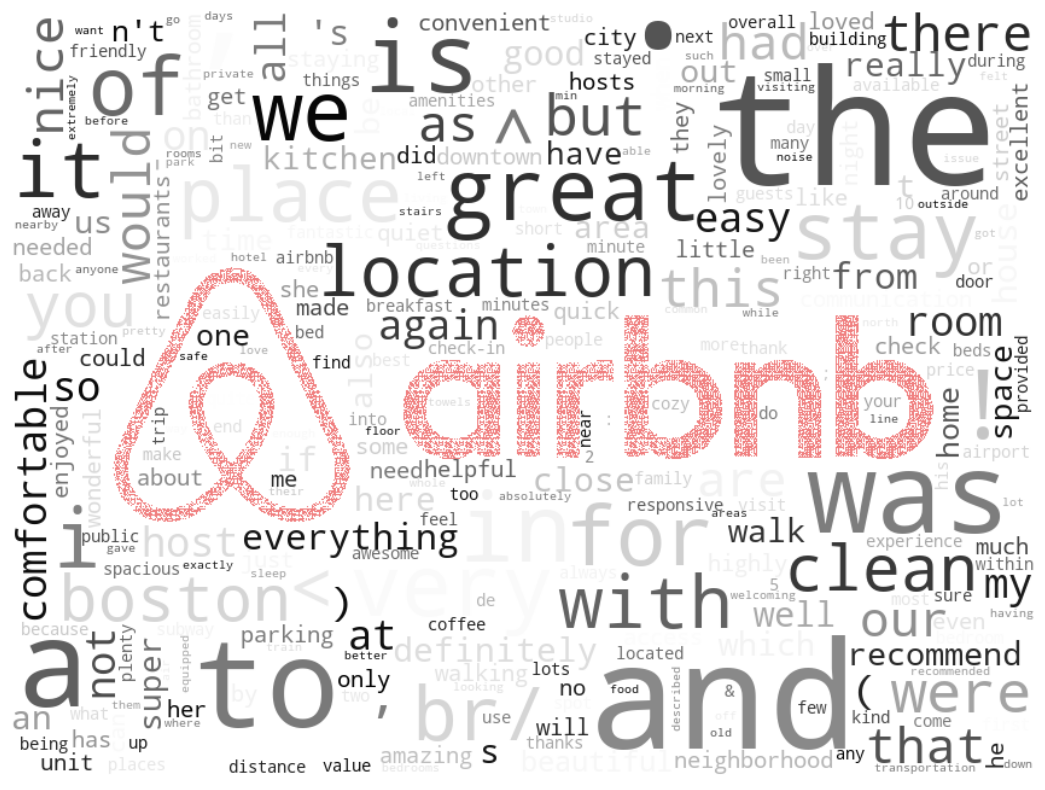

In [55]:
wordcloud = WordCloud(width = 800, height = 500, background_color='white', colormap = 'Greys', max_font_size=150, stopwords=set(),random_state=42,\
                      mask=image_mask,contour_width=0.1,contour_color='lightcoral', max_words = 300)
wordcloud.generate_from_frequencies(comments_dist)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [79]:
freq_words = pd.DataFrame(comments_dist.items(), columns=['word', 'frequency'])
freq_words.sort_values(by = 'frequency', ascending = False).head()

word  frequency
13    .       2818
37  the       2069
40  and       1914
4     ,       1471
10    a       1244

# desired items:

What are the most commonly used words in the descriptions/amenities/reviews of the Airbnb listings with the highest/lowest prices?
Does this change with geographic region?